**Team Machine Mavericks**

***Devi Priya Ravi***

***Dhanasree Rajamani***

***Sravani Thota***

# Objective
The objective of the project is to achieve food sustainability by identifying the sources of greenhouse gas emissions in food production. This includes determining the food products which are significant contributors to greenhouse emissions, the stages of production with the highest emissions, and the countries that produce these food products. Through this analysis, we can determine the role of food producers and consumers in promoting food sustainability.

#Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import  plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot,plot

#Data Understanding

In [2]:
na_vals = ["NA", "Missing", "NaN", "None"]
df = pd.read_csv('https://raw.githubusercontent.com/SravaniThota96/Impactof_FoodProduction_onEnvironment/main/Impactof_FoodProduction_onEnvironment/DataSets/FAO.csv', encoding="latin1", na_values=na_vals)

In [3]:
df.shape

(21477, 63)

In [4]:
print("Records:", df.shape[0])
print("Features:", df.shape[1])

Records: 21477
Features: 63


There are 21k records and 63 features

In [5]:
df.columns

Index(['Area Abbreviation', 'Area Code', 'Area', 'Item Code', 'Item',
       'Element Code', 'Element', 'Unit', 'latitude', 'longitude', 'Y1961',
       'Y1962', 'Y1963', 'Y1964', 'Y1965', 'Y1966', 'Y1967', 'Y1968', 'Y1969',
       'Y1970', 'Y1971', 'Y1972', 'Y1973', 'Y1974', 'Y1975', 'Y1976', 'Y1977',
       'Y1978', 'Y1979', 'Y1980', 'Y1981', 'Y1982', 'Y1983', 'Y1984', 'Y1985',
       'Y1986', 'Y1987', 'Y1988', 'Y1989', 'Y1990', 'Y1991', 'Y1992', 'Y1993',
       'Y1994', 'Y1995', 'Y1996', 'Y1997', 'Y1998', 'Y1999', 'Y2000', 'Y2001',
       'Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009',
       'Y2010', 'Y2011', 'Y2012', 'Y2013'],
      dtype='object')

In [6]:
df.head(5)

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200


In [7]:
df.describe()

,Area Code,Item Code,Element Code,latitude,longitude,Y1961,Y1962,Y1963,Y1964,Y1965,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
count,21477.000000,21477.000000,21477.000000,21477.000000,21477.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,...,21128.000000,21128.000000,21373.000000,21373.000000,21373.000000,21373.000000,21373.000000,21373.000000,21477.000000,21477.000000
mean,125.449411,2694.211529,5211.687154,20.450613,15.794445,195.262069,200.782250,205.464600,209.925577,217.556751,...,486.690742,493.153256,496.319328,508.482104,522.844898,524.581996,535.492069,553.399242,560.569214,575.557480
std,72.868149,148.973406,146.820079,24.628336,66.012104,1864.124336,1884.265591,1861.174739,1862.000116,2014.934333,...,5001.782008,5100.057036,5134.819373,5298.939807,5496.697513,5545.939303,5721.089425,5883.071604,6047.950804,6218.379479
min,1.000000,2511.000000,5142.000000,-40.900000,-172.100000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-169.000000,-246.000000
25%,63.000000,2561.000000,5142.000000,6.430000,-11.780000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,120.000000,2640.000000,5142.000000,20.590000,19.150000,1.000000,1.000000,1.000000,1.000000,1.000000,...,6.000000,6.000000,7.000000,7.000000,7.000000,7.000000,7.000000,8.000000,8.000000,8.000000
75%,188.000000,2782.000000,5142.000000,41.150000,46.870000,21.000000,22.000000,23.000000,24.000000,25.000000,...,75.000000,77.000000,78.000000,80.000000,82.000000,83.000000,83.000000,86.000000,88.000000,90.000000
max,276.000000,2961.000000,5521.000000,64.960000,179.410000,112227.000000,109130.000000,106356.000000,104234.000000,119378.000000,...,360767.000000,373694.000000,388100.000000,402975.000000,425537.000000,434724.000000,451838.000000,462696.000000,479028.000000,489299.000000


Total count is 21477 but few values are missing in years columns.

In [8]:
df.isnull().sum()

Area Abbreviation      0
Area Code              0
Area                   0
Item Code              0
Item                   0
                    ... 
Y2009                104
Y2010                104
Y2011                104
Y2012                  0
Y2013                  0
Length: 63, dtype: int64

There are missing entries in few years.

In [9]:
df.dtypes[df.dtypes == 'object']

Area Abbreviation    object
Area                 object
Item                 object
Element              object
Unit                 object
dtype: object

Only 5 categorical features.

In [10]:
df.dtypes[df.dtypes != 'object']

Area Code         int64
Item Code         int64
Element Code      int64
latitude        float64
longitude       float64
Y1961           float64
Y1962           float64
Y1963           float64
Y1964           float64
Y1965           float64
Y1966           float64
Y1967           float64
Y1968           float64
Y1969           float64
Y1970           float64
Y1971           float64
Y1972           float64
Y1973           float64
Y1974           float64
Y1975           float64
Y1976           float64
Y1977           float64
Y1978           float64
Y1979           float64
Y1980           float64
Y1981           float64
Y1982           float64
Y1983           float64
Y1984           float64
Y1985           float64
Y1986           float64
Y1987           float64
Y1988           float64
Y1989           float64
Y1990           float64
Y1991           float64
Y1992           float64
Y1993           float64
Y1994           float64
Y1995           float64
Y1996           float64
Y1997           

# Data Preparation

In [11]:
df.head(3)

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360


Let's remove few features.

In [12]:
features = ['Area Abbreviation', 'Area Code', 'Item Code', 'Element Code', 'latitude', 'longitude']

df.drop(features, axis = 1, inplace = True)

In [13]:
df.head(3)

,Area,Item,Element,Unit,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,Afghanistan,Wheat and products,Food,1000 tonnes,1928.0,1904.0,1666.0,1950.0,2001.0,1808.0,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,Afghanistan,Rice (Milled Equivalent),Food,1000 tonnes,183.0,183.0,182.0,220.0,220.0,195.0,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,Afghanistan,Barley and products,Feed,1000 tonnes,76.0,76.0,76.0,76.0,76.0,75.0,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360


Let's rename columns

In [14]:
df.dtypes[df.dtypes != 'float64']

Area       object
Item       object
Element    object
Unit       object
Y2012       int64
Y2013       int64
dtype: object

Only the years 2012 and 2013 are in integers, so typecast to float

In [15]:
df['Y2012'] = df['Y2012'].astype('float64')

In [16]:
df.head(5)

,Area,Item,Element,Unit,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,Afghanistan,Wheat and products,Food,1000 tonnes,1928.0,1904.0,1666.0,1950.0,2001.0,1808.0,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810.0,4895
1,Afghanistan,Rice (Milled Equivalent),Food,1000 tonnes,183.0,183.0,182.0,220.0,220.0,195.0,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425.0,422
2,Afghanistan,Barley and products,Feed,1000 tonnes,76.0,76.0,76.0,76.0,76.0,75.0,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367.0,360
3,Afghanistan,Barley and products,Food,1000 tonnes,237.0,237.0,237.0,238.0,238.0,237.0,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78.0,89
4,Afghanistan,Maize and products,Feed,1000 tonnes,210.0,210.0,214.0,216.0,216.0,216.0,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200.0,200


* Fill the missing values with previous years value, because the production is almost equal to the previous year and next year.

In [17]:
df.fillna(method = 'ffill', inplace = True)

In [18]:
df.isnull().sum()

Area       0
Item       0
Element    0
Unit       0
Y1961      0
Y1962      0
Y1963      0
Y1964      0
Y1965      0
Y1966      0
Y1967      0
Y1968      0
Y1969      0
Y1970      0
Y1971      0
Y1972      0
Y1973      0
Y1974      0
Y1975      0
Y1976      0
Y1977      0
Y1978      0
Y1979      0
Y1980      0
Y1981      0
Y1982      0
Y1983      0
Y1984      0
Y1985      0
Y1986      0
Y1987      0
Y1988      0
Y1989      0
Y1990      0
Y1991      0
Y1992      0
Y1993      0
Y1994      0
Y1995      0
Y1996      0
Y1997      0
Y1998      0
Y1999      0
Y2000      0
Y2001      0
Y2002      0
Y2003      0
Y2004      0
Y2005      0
Y2006      0
Y2007      0
Y2008      0
Y2009      0
Y2010      0
Y2011      0
Y2012      0
Y2013      0
dtype: int64

In [19]:
df_pivot = df.copy()

In [20]:
df_columns = list(df_pivot.columns[-53:])

In [21]:
df_pivot = pd.pivot_table(df_pivot, df_columns, columns = df_pivot['Area'], aggfunc=np.sum)

In [22]:
df_summary = df_pivot.reset_index()

In [23]:
df_summary.head(5)

Area,index,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
0,Y1961,9481.0,1706.0,7488.0,4834.0,92.0,43402.0,0.0,25795.0,22542.0,...,12367.0,559347.0,4631.0,0.0,97.0,9523.0,23856.0,2982.0,2976.0,3260.0
1,Y1962,9414.0,1749.0,7235.0,4775.0,94.0,40784.0,0.0,27618.0,22627.0,...,12810.0,556319.0,4448.0,0.0,101.0,9369.0,25220.0,3038.0,3057.0,3503.0
2,Y1963,9194.0,1767.0,6861.0,5240.0,105.0,40219.0,0.0,28902.0,23637.0,...,13109.0,552630.0,4682.0,0.0,103.0,9788.0,26053.0,3147.0,3069.0,3479.0
3,Y1964,10170.0,1889.0,7255.0,5286.0,95.0,41638.0,0.0,29107.0,24099.0,...,12965.0,555677.0,4723.0,0.0,102.0,10539.0,26377.0,3224.0,3121.0,3738.0
4,Y1965,10473.0,1884.0,7509.0,5527.0,84.0,44936.0,0.0,28961.0,22664.0,...,13742.0,589288.0,4581.0,0.0,107.0,10641.0,26961.0,3328.0,3236.0,3940.0


In [24]:
df_summary.columns = df_summary.columns.str.replace('index', 'Year')

In [25]:
df_summary.head(5)

Area,Year,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
0,Y1961,9481.0,1706.0,7488.0,4834.0,92.0,43402.0,0.0,25795.0,22542.0,...,12367.0,559347.0,4631.0,0.0,97.0,9523.0,23856.0,2982.0,2976.0,3260.0
1,Y1962,9414.0,1749.0,7235.0,4775.0,94.0,40784.0,0.0,27618.0,22627.0,...,12810.0,556319.0,4448.0,0.0,101.0,9369.0,25220.0,3038.0,3057.0,3503.0
2,Y1963,9194.0,1767.0,6861.0,5240.0,105.0,40219.0,0.0,28902.0,23637.0,...,13109.0,552630.0,4682.0,0.0,103.0,9788.0,26053.0,3147.0,3069.0,3479.0
3,Y1964,10170.0,1889.0,7255.0,5286.0,95.0,41638.0,0.0,29107.0,24099.0,...,12965.0,555677.0,4723.0,0.0,102.0,10539.0,26377.0,3224.0,3121.0,3738.0
4,Y1965,10473.0,1884.0,7509.0,5527.0,84.0,44936.0,0.0,28961.0,22664.0,...,13742.0,589288.0,4581.0,0.0,107.0,10641.0,26961.0,3328.0,3236.0,3940.0


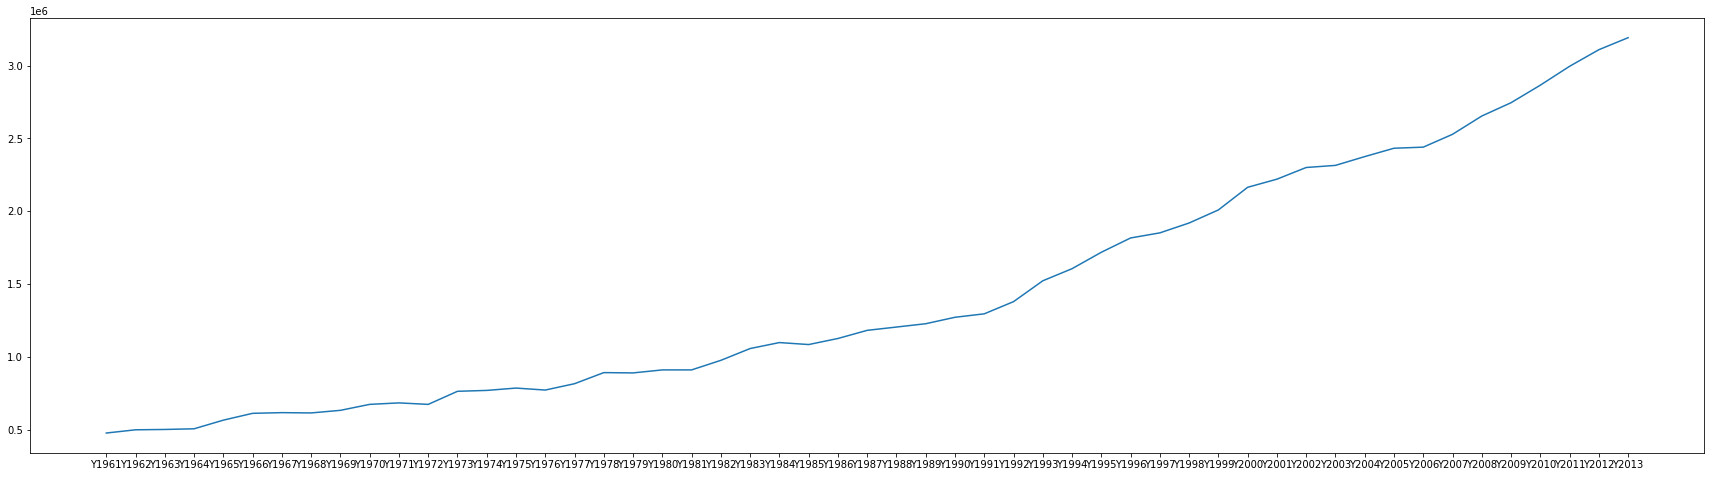

In [26]:
fig, ax = plt.subplots(figsize=(30, 8))
plt.plot(df_summary['Year'], df_summary['China, mainland'])

* Production increased significantly.

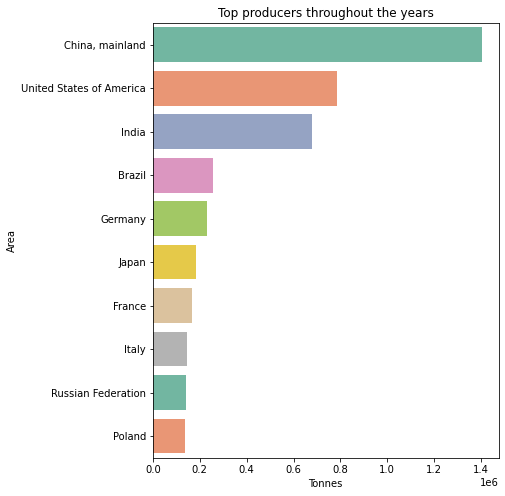

In [27]:
#@title
columns = df.dtypes[df.dtypes == "float64"].index
top_countries=df.groupby(["Area"])[columns].sum()
top=pd.DataFrame(top_countries.agg("mean",axis=1).sort_values(ascending=False),columns=["Tonnes"])[:10]

#Plot the top producers
plt.figure(figsize=(8,8))
plt.gca().set_title("Top producers throughout the years")
sns.barplot(x=top["Tonnes"],y=top.index,data=top, palette="Set2")
plt.gcf().subplots_adjust(left=.3)
plt.show()

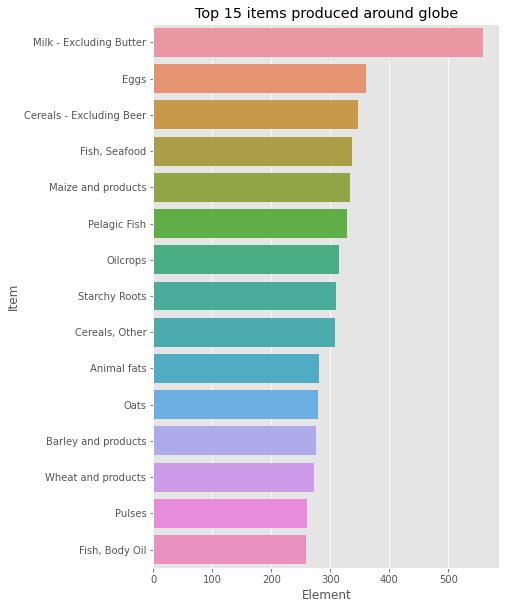

In [28]:
#@title
plt.style.use("ggplot")
items=pd.DataFrame(df.groupby("Item")["Element"].agg("count").sort_values(ascending=False))[:15]
plt.figure(figsize=(8,10))
plt.gcf().subplots_adjust(left=.3)
sns.barplot(x=items.Element,y=items.index,data=items)
plt.gca().set_title("Top 15 items produced around globe")
plt.show()

In [29]:
#@title
foo=df.groupby(["Element"]).agg("sum")
foo=foo.sum(axis=1)
labels=["Feed","Food"]
values=[foo[0],foo[1]]

trace=go.Pie(labels=labels,values=values)
iplot([trace],filename="food_feed",validate=False)

* Food and feed plot for the largest producers(India, USA, China)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



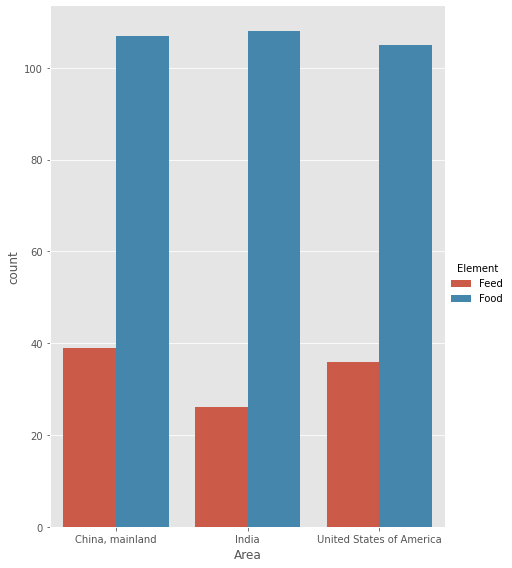

In [30]:
#@title
sns.catplot("Area", data=df[(df['Area'] == "India") | (df['Area'] == "China, mainland") | (df['Area'] == "United States of America")], kind="count", hue="Element", height=8, aspect=.8)

Now, we create a dataframe with countries as index and their annual produce as columns from 1961 to 2013.

In [31]:
area_list = list(df['Area'].unique())
year_list = list(df.iloc[:,10:].columns)

In [32]:
new_df_dict = {}
for ar in area_list:
    yearly_produce = []
    for yr in year_list:
        yearly_produce.append(df[yr][df['Area']==ar].sum())
    new_df_dict[ar] = yearly_produce
new_df = pd.DataFrame(new_df_dict)

new_df = pd.DataFrame.transpose(new_df)
new_df.columns = year_list

new_df.head()

,Y1967,Y1968,Y1969,Y1970,Y1971,Y1972,Y1973,Y1974,Y1975,Y1976,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
Afghanistan,11289.0,11508.0,11815.0,10454.0,10433.0,11121.0,11759.0,12017.0,12348.0,13090.0,...,16542.0,17658.0,18317.0,19248.0,19381.0,20661.0,21030.0,21100.0,22706.0,23007.0
Albania,2046.0,2169.0,2230.0,2395.0,2376.0,2478.0,2575.0,2728.0,2822.0,3097.0,...,6637.0,6719.0,6911.0,6744.0,7168.0,7316.0,7907.0,8114.0,8221.0,8271.0
Algeria,7986.0,8839.0,9003.0,9355.0,9891.0,10711.0,11085.0,12418.0,14042.0,14248.0,...,48619.0,49562.0,51067.0,49933.0,50916.0,57505.0,60071.0,65852.0,69365.0,72161.0
Angola,5833.0,5685.0,6219.0,6460.0,6603.0,6499.0,6639.0,6526.0,6211.0,6413.0,...,25541.0,26696.0,28247.0,29877.0,32053.0,36985.0,38400.0,40573.0,38064.0,48639.0
Antigua and Barbuda,64.0,59.0,68.0,77.0,85.0,57.0,58.0,56.0,59.0,55.0,...,92.0,115.0,110.0,122.0,115.0,114.0,115.0,118.0,113.0,119.0


In [33]:
new_df.shape

(174, 47)

Add mean produce and ranking columns.

In [34]:
mean_produce = []
for i in range(174):
    mean_produce.append(new_df.iloc[i,:].values.mean())
new_df['Mean_Produce'] = mean_produce

new_df['Rank'] = new_df['Mean_Produce'].rank(ascending=False)

new_df.head()

,Y1967,Y1968,Y1969,Y1970,Y1971,Y1972,Y1973,Y1974,Y1975,Y1976,...,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Mean_Produce,Rank
Afghanistan,11289.0,11508.0,11815.0,10454.0,10433.0,11121.0,11759.0,12017.0,12348.0,13090.0,...,18317.0,19248.0,19381.0,20661.0,21030.0,21100.0,22706.0,23007.0,13409.808511,70.0
Albania,2046.0,2169.0,2230.0,2395.0,2376.0,2478.0,2575.0,2728.0,2822.0,3097.0,...,6911.0,6744.0,7168.0,7316.0,7907.0,8114.0,8221.0,8271.0,4813.021277,106.0
Algeria,7986.0,8839.0,9003.0,9355.0,9891.0,10711.0,11085.0,12418.0,14042.0,14248.0,...,51067.0,49933.0,50916.0,57505.0,60071.0,65852.0,69365.0,72161.0,31632.531915,38.0
Angola,5833.0,5685.0,6219.0,6460.0,6603.0,6499.0,6639.0,6526.0,6211.0,6413.0,...,28247.0,29877.0,32053.0,36985.0,38400.0,40573.0,38064.0,48639.0,14354.829787,69.0
Antigua and Barbuda,64.0,59.0,68.0,77.0,85.0,57.0,58.0,56.0,59.0,55.0,...,110.0,122.0,115.0,114.0,115.0,118.0,113.0,119.0,83.042553,173.0


Now, we create another dataframe with items and their total production each year from 1961 to 2013

In [35]:
item_list = list(df['Item'].unique())

item_df = pd.DataFrame()
item_df['Item_Name'] = item_list

for yr in year_list:
    item_produce = []
    for it in item_list:
        item_produce.append(df[yr][df['Item']==it].sum())
    item_df[yr] = item_produce
item_df.head()

,Item_Name,Y1967,Y1968,Y1969,Y1970,Y1971,Y1972,Y1973,Y1974,Y1975,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,Wheat and products,171525.0,179610.0,189740.0,195347.0,201839.0,214401.0,217498.0,218112.0,220774.0,...,527396.0,532265.0,537283.0,529275.0,562241.0,557247.0,549928.0,578183.0,576597.0,587492
1,Rice (Milled Equivalent),158617.0,164656.0,167965.0,181763.0,185691.0,187233.0,191882.0,196307.0,204634.0,...,361108.0,366026.0,372631.0,378700.0,389709.0,394222.0,398560.0,404154.0,406787.0,410880
2,Barley and products,56480.0,60535.0,65582.0,65862.0,70881.0,69484.0,73723.0,72719.0,75716.0,...,102056.0,97187.0,100983.0,93312.0,98210.0,99136.0,92564.0,92572.0,88766.0,99452
3,Maize and products,213106.0,215693.0,222035.0,226324.0,238694.0,252069.0,262117.0,244481.0,264868.0,...,545026.0,549038.0,543284.0,573896.0,592233.0,557942.0,584339.0,603301.0,608730.0,671300
4,Millet and products,23026.0,21826.0,24009.0,27140.0,23850.0,20559.0,25418.0,21591.0,23812.0,...,25791.0,25497.0,26001.0,26754.0,26375.0,24577.0,27041.0,25744.0,26105.0,26346


Similar to countries ranking, rank items as well.

In [36]:
sum_col = []
for i in range(115):
    sum_col.append(item_df.iloc[i,1:].values.sum())
item_df['Sum'] = sum_col
item_df['Production_Rank'] = item_df['Sum'].rank(ascending=False)

item_df.head()

,Item_Name,Y1967,Y1968,Y1969,Y1970,Y1971,Y1972,Y1973,Y1974,Y1975,...,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Sum,Production_Rank
0,Wheat and products,171525.0,179610.0,189740.0,195347.0,201839.0,214401.0,217498.0,218112.0,220774.0,...,537283.0,529275.0,562241.0,557247.0,549928.0,578183.0,576597.0,587492,18284744.0,6.0
1,Rice (Milled Equivalent),158617.0,164656.0,167965.0,181763.0,185691.0,187233.0,191882.0,196307.0,204634.0,...,372631.0,378700.0,389709.0,394222.0,398560.0,404154.0,406787.0,410880,13635581.0,9.0
2,Barley and products,56480.0,60535.0,65582.0,65862.0,70881.0,69484.0,73723.0,72719.0,75716.0,...,100983.0,93312.0,98210.0,99136.0,92564.0,92572.0,88766.0,99452,4147172.0,20.0
3,Maize and products,213106.0,215693.0,222035.0,226324.0,238694.0,252069.0,262117.0,244481.0,264868.0,...,543284.0,573896.0,592233.0,557942.0,584339.0,603301.0,608730.0,671300,18900567.0,5.0
4,Millet and products,23026.0,21826.0,24009.0,27140.0,23850.0,20559.0,25418.0,21591.0,23812.0,...,26001.0,26754.0,26375.0,24577.0,27041.0,25744.0,26105.0,26346,1115941.0,38.0


In [37]:
item_df.shape

(115, 50)

In [38]:
item_df.Item_Name[item_df.Sum[item_df.Sum == item_df['Sum'].max()].index]

56    Cereals - Excluding Beer
Name: Item_Name, dtype: object

In [39]:
item_df['Item_Name'][item_df['Production_Rank'] < 11.0].sort_values()

56    Cereals - Excluding Beer
65     Fruits - Excluding Wine
3           Maize and products
53     Milk - Excluding Butter
6        Potatoes and products
1     Rice (Milled Equivalent)
57               Starchy Roots
64                  Vegetables
27           Vegetables, Other
0           Wheat and products
Name: Item_Name, dtype: object

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



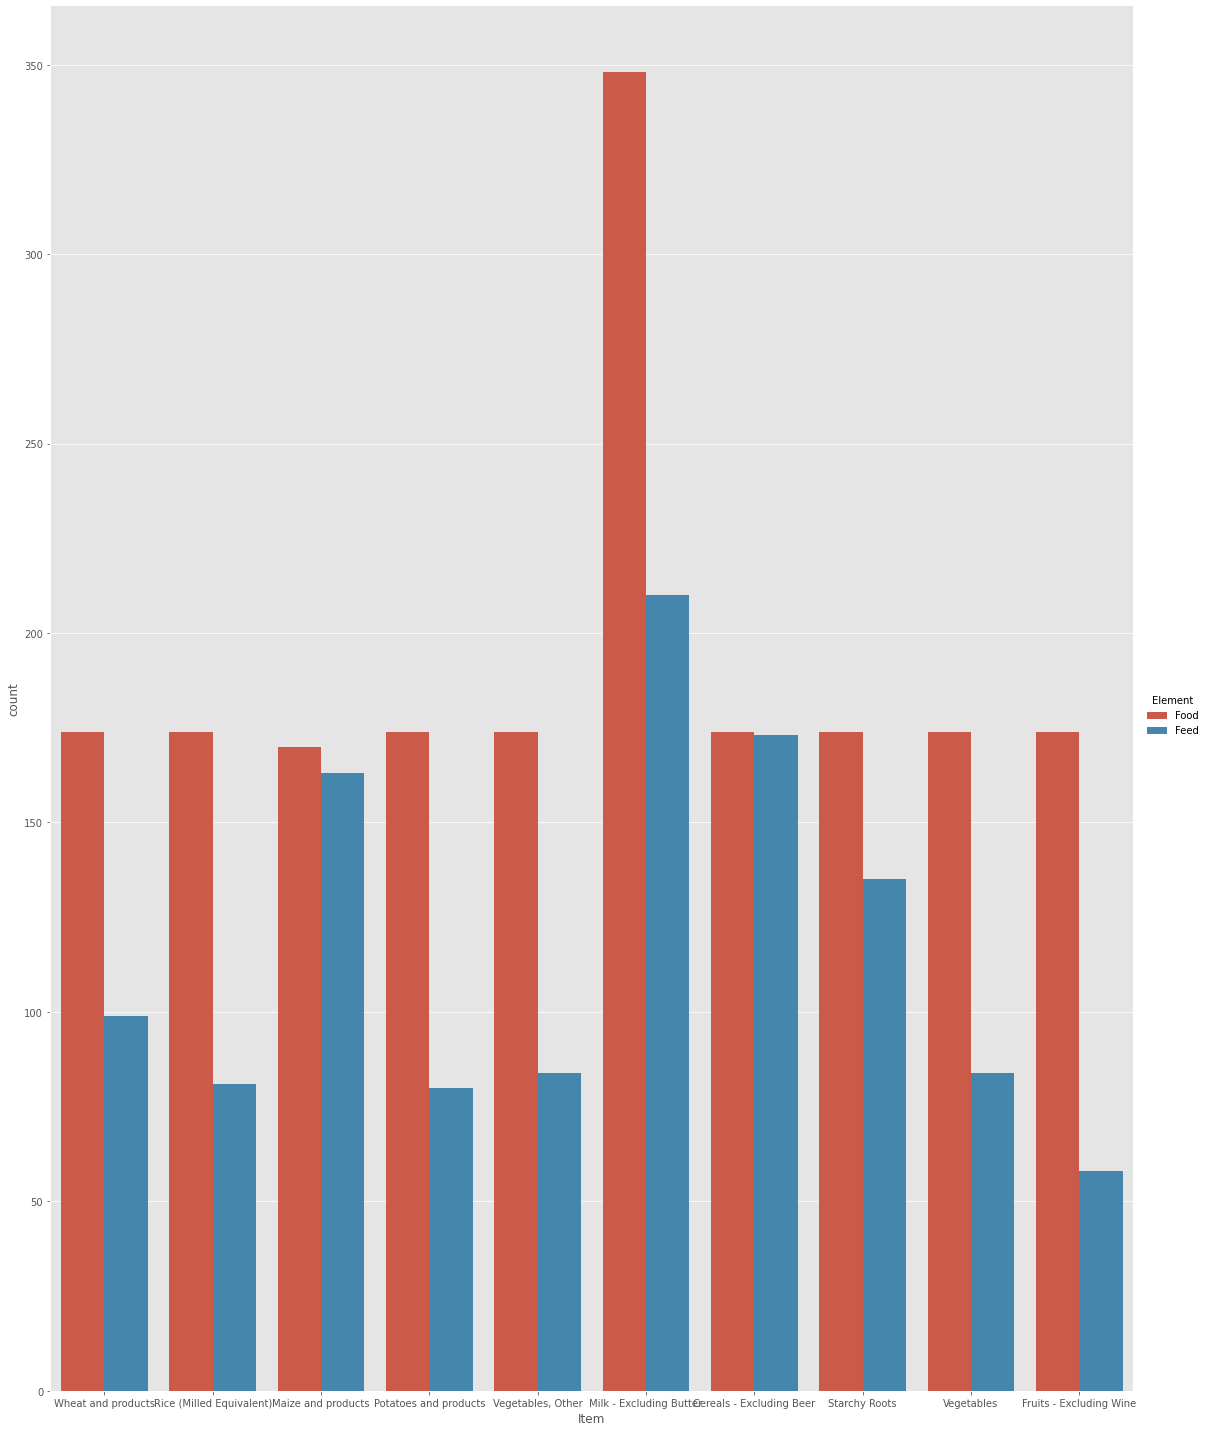

In [40]:
sns.catplot("Item", data=df[(df['Item']=='Wheat and products') | (df['Item']=='Rice (Milled Equivalent)') | (df['Item']=='Maize and products') | (df['Item']=='Potatoes and products') | (df['Item']=='Vegetables, Other') | (df['Item']=='Milk - Excluding Butter') | (df['Item']=='Cereals - Excluding Beer') | (df['Item']=='Starchy Roots') | (df['Item']=='Vegetables') | (df['Item']=='Fruits - Excluding Wine')], kind="count", hue="Element", height=20, aspect=.8)
plt.show()

* Heatmap

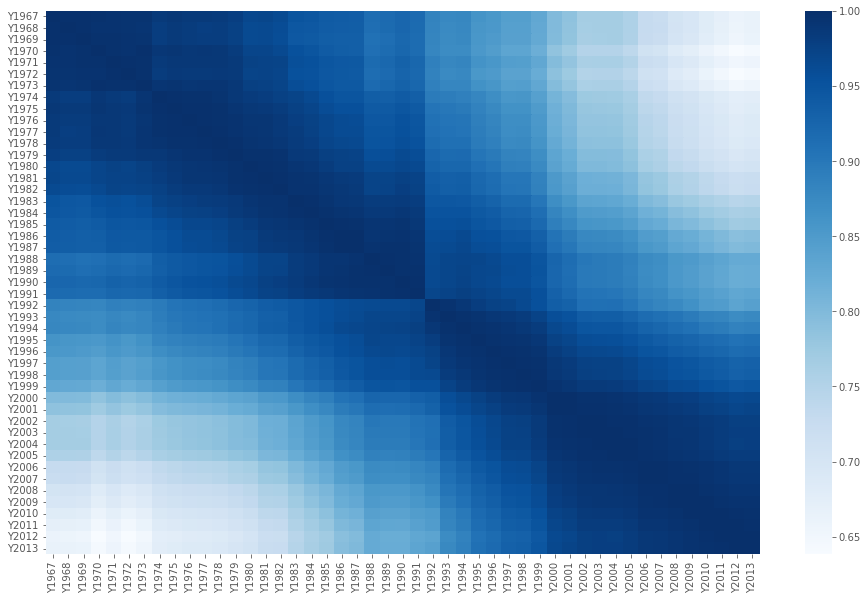

In [41]:
year_df = df.iloc[:,10:]
fig, ax = plt.subplots(figsize=(16,10))
sns.heatmap(year_df.corr(), ax=ax, cmap='Blues')

# Fractal Clustering

In [42]:
new_df.head()

,Y1967,Y1968,Y1969,Y1970,Y1971,Y1972,Y1973,Y1974,Y1975,Y1976,...,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Mean_Produce,Rank
Afghanistan,11289.0,11508.0,11815.0,10454.0,10433.0,11121.0,11759.0,12017.0,12348.0,13090.0,...,18317.0,19248.0,19381.0,20661.0,21030.0,21100.0,22706.0,23007.0,13409.808511,70.0
Albania,2046.0,2169.0,2230.0,2395.0,2376.0,2478.0,2575.0,2728.0,2822.0,3097.0,...,6911.0,6744.0,7168.0,7316.0,7907.0,8114.0,8221.0,8271.0,4813.021277,106.0
Algeria,7986.0,8839.0,9003.0,9355.0,9891.0,10711.0,11085.0,12418.0,14042.0,14248.0,...,51067.0,49933.0,50916.0,57505.0,60071.0,65852.0,69365.0,72161.0,31632.531915,38.0
Angola,5833.0,5685.0,6219.0,6460.0,6603.0,6499.0,6639.0,6526.0,6211.0,6413.0,...,28247.0,29877.0,32053.0,36985.0,38400.0,40573.0,38064.0,48639.0,14354.829787,69.0
Antigua and Barbuda,64.0,59.0,68.0,77.0,85.0,57.0,58.0,56.0,59.0,55.0,...,110.0,122.0,115.0,114.0,115.0,118.0,113.0,119.0,83.042553,173.0


In [43]:
df1 = new_df.copy()
df1 = df1.reset_index()
df1.rename(columns={ df1.columns[0]: "Country" }, inplace = True)

In [44]:
df1.head(2)

,Country,Y1967,Y1968,Y1969,Y1970,Y1971,Y1972,Y1973,Y1974,Y1975,...,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Mean_Produce,Rank
0,Afghanistan,11289.0,11508.0,11815.0,10454.0,10433.0,11121.0,11759.0,12017.0,12348.0,...,18317.0,19248.0,19381.0,20661.0,21030.0,21100.0,22706.0,23007.0,13409.808511,70.0
1,Albania,2046.0,2169.0,2230.0,2395.0,2376.0,2478.0,2575.0,2728.0,2822.0,...,6911.0,6744.0,7168.0,7316.0,7907.0,8114.0,8221.0,8271.0,4813.021277,106.0


In [45]:
country_prod = df1[['Country', 'Mean_Produce']]

In [46]:
country_prod.head(5)

,Country,Mean_Produce
0,Afghanistan,13409.808511
1,Albania,4813.021277
2,Algeria,31632.531915
3,Angola,14354.829787
4,Antigua and Barbuda,83.042553


# Fractal Clustering with Fractal Distance

In [47]:
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn import metrics

In [48]:
!pip install pyclustering

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 52.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395121 sha256=41144924a4e54d56b7b72d9afffa4583f2efb8736db630d7df8f03ae3257f39f
  Stored in directory: /root/.cache/pip/wheels/dc/25/8b/072b221a5cff4f04e7999d39ca1b6cb5dad702cc3e1da951d4
Successfully built pyclustering


In [52]:
# pyclustering kmeans
from pyclustering.cluster.kmeans import kmeans
from pyclustering.utils.metric import distance_metric, type_metric
from pyclustering.cluster.center_initializer import random_center_initializer
from pyclustering.cluster.encoder import type_encoding
from pyclustering.cluster.encoder import cluster_encoder

In [59]:
df = country_prod.copy()

In [60]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Country'] = le.fit_transform(df['Country'])

In [61]:
import numpy as np
def fractal_distance(list1, list2, num_divisions = 6):
  x1, y1 = list1
  x2, y2 = list2

  #print(x1, y1, x2, y2)
  
  # Create a grid with num_divisions x num_divisions boxes
  x = np.linspace(min(x1, x2), max(x1, x2), num_divisions + 1)
  y = np.linspace(min(y1, y2), max(y1, y2), num_divisions + 1)
  grid = np.zeros((num_divisions + 1, num_divisions + 1))
  # Place a point at each of the two endpoints
  x1_idx = np.argmin(np.abs(x - x1))
  y1_idx = np.argmin(np.abs(y - y1))
  grid[y1_idx, x1_idx] = 1
  x2_idx = np.argmin(np.abs(x - x2))
  y2_idx = np.argmin(np.abs(y - y2))
  grid[y2_idx, x2_idx] = 1
  # Count the number of boxes that contain at least one point
  num_boxes_with_points = 0
  for i in range(num_divisions):
    for j in range(num_divisions):
      if np.sum(grid[i:i+2, j:j+2]) > 0:
        num_boxes_with_points += 1
  # Calculate the fractal dimension and use it to estimate the length of the path
  fractal_dim = np.log(num_boxes_with_points) / np.log(2)
  fractal_length = (2 ** fractal_dim) * ((x2 - x1) ** 2 + (y2 - y1) ** 2) ** 0.5
  return fractal_length

In [78]:
def plot_cluster(df, max_loop=50):
    """
    Looking at the performance of various number of clusters using K-Means.
    Performance is evaluated by within cluster SSE and silhouette score.
    """
    try:
        df.drop('cluster_fract', axis=1, inplace=True)
    except:
        next
    
    
    X = df.values
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)
    
    #kmeans = KMeans(n_clusters=clusters, random_state=10, n_init=10) #, n_jobs=-1)  
    #kmeans.fit(X_rb) 
    
    sse_within_cluster = {}
    silhouette_score = {}
    
    for k in range(2, max_loop):
        initial_centers = random_center_initializer(X_rb, k, random_state=5).initialize()
        # instanceKm = kmeans(X, initial_centers=initial_centers, metric=distance_metric(fractal_distance(1,1,1,1,2)))
        instanceKm = kmeans(X_rb, initial_centers=initial_centers, metric=distance_metric(type_metric.USER_DEFINED,func=fractal_distance))
        instanceKm.process()
        # cluster analysis results - clusters and centers
        pyClusters = instanceKm.get_clusters()
        pyCenters = instanceKm.get_centers()
        # enumerate encoding type to index labeling to get labels
        pyEncoding = instanceKm.get_cluster_encoding()
        pyEncoder = cluster_encoder(pyEncoding, pyClusters, X_rb)
        pyLabels = pyEncoder.set_encoding(0).get_clusters()
    
        sse_within_cluster[k] = instanceKm.get_total_wce()
        silhouette_score[k] = metrics.silhouette_score(X_rb, pyLabels, random_state=10, metric=distance_metric(type_metric.USER_DEFINED,func=fractal_distance))

    _ = plt.figure(figsize=(10,6))
    ax1 = plt.subplot(211)
    _ = plt.plot(list(sse_within_cluster.keys()), list(sse_within_cluster.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("SSE Within Cluster")
    _ = plt.title("Within Cluster SSE After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)
    
    ax2 = plt.subplot(212)
    _ = plt.plot(list(silhouette_score.keys()), list(silhouette_score.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("Silhouette Score")
    _ = plt.title("Silhouette Score After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)
    
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)

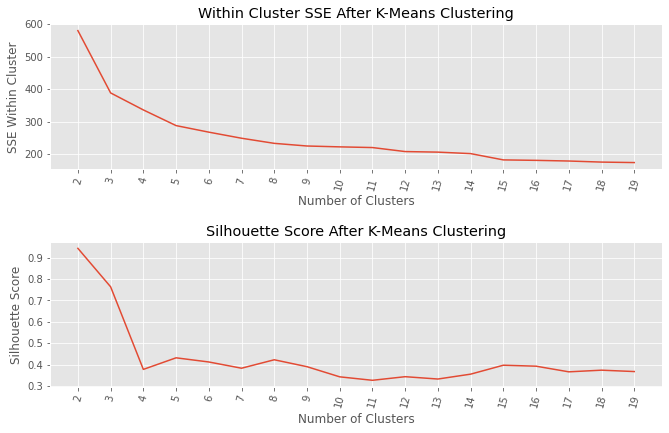

In [63]:
plot_cluster(df, max_loop = 20)

In [77]:
def apply_cluster(df, clusters=2):
    """
    Applying K-Means with the optimal number of clusters identified
    """
    try:
        df.drop('cluster_fract', axis=1, inplace=True)
    except:
        next
    X = df.values
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)
    
    initial_centers = random_center_initializer(X_rb, clusters, random_state=5).initialize()
    # instanceKm = kmeans(X, initial_centers=initial_centers, metric=distance_metric(fractal_distance(1,1,1,1,2)))
    instanceKm = kmeans(X_rb, initial_centers=initial_centers, metric=distance_metric(type_metric.USER_DEFINED,func=fractal_distance))
    instanceKm.process()
    # cluster analysis results - clusters and centers
    pyClusters = instanceKm.get_clusters()
    pyCenters = instanceKm.get_centers()
    # enumerate encoding type to index labeling to get labels
    pyEncoding = instanceKm.get_cluster_encoding()
    pyEncoder = cluster_encoder(pyEncoding, pyClusters, X_rb)
    pyLabels = pyEncoder.set_encoding(0).get_clusters()
    
    
    score = metrics.silhouette_score(X_rb, pyLabels, random_state=10)
    df['cluster_fract'] = pyLabels
    sse_within_cluster = instanceKm.get_total_wce()
    
    print("clustering performance")
    print("-----------------------------------")
    print("silhouette score: " + str(score))
    print("sse within cluster: " + str(sse_within_cluster))
    
    return df

In [71]:
first_trial = apply_cluster(df, clusters = 3)

clustering performance
-----------------------------------
silhouette score: 0.7639895837087987
sse within cluster: 388.44697939449156


In [72]:
cluster_perf_df = (
    first_trial
    .groupby('cluster_fract')
    .agg({"Mean_Produce":"mean", "Country":"count"})
    .sort_values('Mean_Produce', ascending=False)
    .reset_index()
)

cluster_perf_df

,cluster_fract,Mean_Produce,Country
0,1,1.035554e+06,3
1,0,1.471231e+05,17
2,2,1.294202e+04,154


In [73]:
first_trial.query("cluster_fract == 1")

,Country,Mean_Produce,cluster_fract
34,35,1.555013e+06,1
73,73,7.365464e+05,1
165,165,8.151018e+05,1


In [74]:
country_prod.iloc[34], country_prod.iloc[73], country_prod.iloc[165]

(Country         China, mainland
 Mean_Produce     1555012.851064
 Name: 34, dtype: object, Country                 India
 Mean_Produce    736546.382979
 Name: 73, dtype: object, Country         United States of America
 Mean_Produce               815101.829787
 Name: 165, dtype: object)

In [75]:
first_sub = first_trial.query("cluster_fract == 2").reset_index(drop = True)

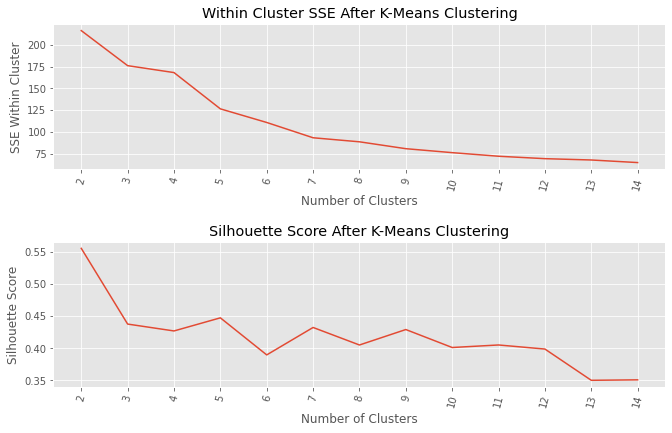

In [79]:
plot_cluster(first_sub, max_loop=15)

In [81]:
cluster_fractal1 = apply_cluster(first_sub, clusters = 2)

clustering performance
-----------------------------------
silhouette score: 0.5558855207785611
sse within cluster: 216.3070985772304


In [82]:
cluster_perf_df = (
    cluster_fractal1
    .groupby('cluster_fract')
    .agg({"Mean_Produce":"mean", "Country":"count"})
    .sort_values('Mean_Produce', ascending=False)
    .reset_index()
)

cluster_perf_df

,cluster_fract,Mean_Produce,Country
0,0,42727.256107,27
1,1,6609.730106,127


In [83]:
second_sub = cluster_fractal1.query("cluster_fract == 1").reset_index(drop = True)

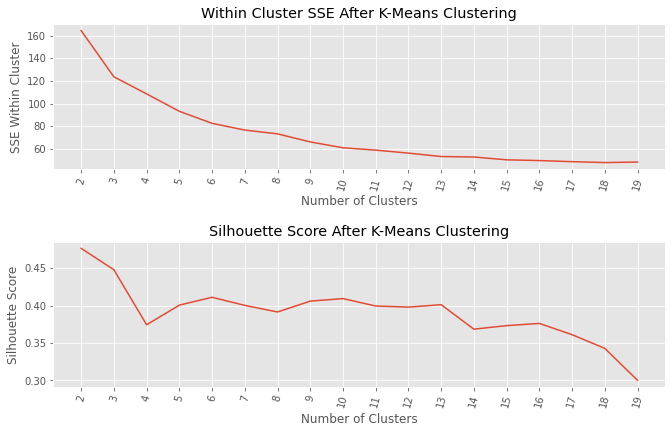

In [85]:
plot_cluster(second_sub, max_loop=20)

In [90]:
cluster_fractal2 = apply_cluster(second_sub, clusters = 2)

clustering performance
-----------------------------------
silhouette score: 0.47662890994478574
sse within cluster: 164.43345729101165


In [91]:
cluster_perf_df = (
    cluster_fractal2
    .groupby('cluster_fract')
    .agg({"Mean_Produce":"mean", "Country":"count"})
    .sort_values('Mean_Produce', ascending=False)
    .reset_index()
)

cluster_perf_df

,cluster_fract,Mean_Produce,Country
0,1,16853.994681,32
1,0,3159.030459,95


In [92]:
third_sub = cluster_fractal2.query("cluster_fract == 0").reset_index(drop = True)

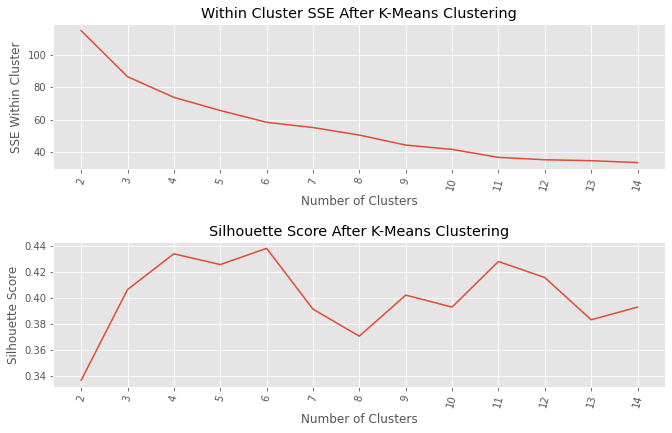

In [94]:
plot_cluster(third_sub, max_loop = 15)

In [98]:
cluster_fractal3 = apply_cluster(third_sub, clusters = 3)

clustering performance
-----------------------------------
silhouette score: 0.40621010218577464
sse within cluster: 86.54670401105041


In [99]:
cluster_perf_df = (
    cluster_fractal3
    .groupby('cluster_fract')
    .agg({"Mean_Produce":"mean", "Country":"count"})
    .sort_values('Mean_Produce', ascending=False)
    .reset_index()
)

cluster_perf_df

,cluster_fract,Mean_Produce,Country
0,2,6841.727204,28
1,0,1674.576193,37
2,1,1552.673759,30


In [ ]:
cluster_fractal3.query('cluster_fract == 0')

In [102]:
fourth_sub = cluster_fractal3.query('cluster_fract == 0').reset_index(drop = True)

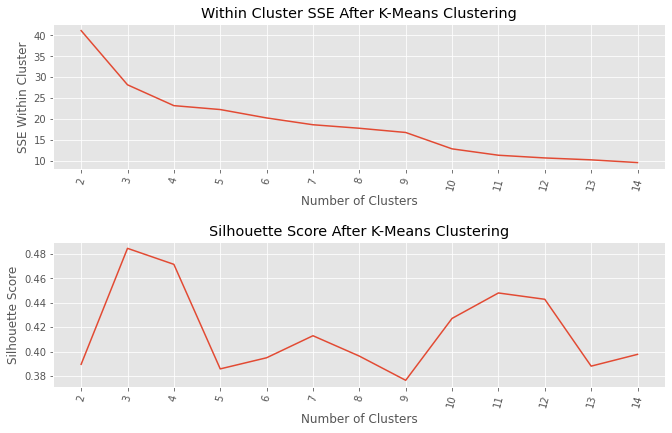

In [103]:
plot_cluster(fourth_sub, max_loop = 15)

In [106]:
cluster_fractal4 = apply_cluster(fourth_sub, clusters = 4)

clustering performance
-----------------------------------
silhouette score: 0.4715307327815242
sse within cluster: 23.23013587420733


In [107]:
cluster_perf_df = (
    cluster_fractal4
    .groupby('cluster_fract')
    .agg({"Mean_Produce":"mean", "Country":"count"})
    .sort_values('Mean_Produce', ascending=False)
    .reset_index()
)

cluster_perf_df

,cluster_fract,Mean_Produce,Country
0,1,3986.046099,6
1,0,2572.659574,8
2,2,808.708207,14
3,3,682.205674,9


In [108]:
for n in cluster_fractal4.Country.values:
  print(country_prod.Country[n])

Kiribati
Kuwait
Latvia
Lesotho
Liberia
Luxembourg
Maldives
Malta
Mauritania
Mauritius
Mongolia
Montenegro
Namibia
New Caledonia
Nicaragua
Oman
Panama
Saint Kitts and Nevis
Saint Lucia
Saint Vincent and the Grenadines
Samoa
Sao Tome and Principe
Serbia
Sierra Leone
Slovenia
Solomon Islands
Sudan
Suriname
Swaziland
Tajikistan
The former Yugoslav Republic of Macedonia
Timor-Leste
Togo
Trinidad and Tobago
Turkmenistan
United Arab Emirates
Vanuatu


In [ ]:
def pyCluster(df, clusters = 2):

    try:
        df.drop('cluster_fract', axis=1, inplace=True)
    except:
        next

    X = df.values
    initial_centers = random_center_initializer(X, clusters, random_state=5).initialize()
    instanceKm = kmeans(X, initial_centers=initial_centers, metric=distance_metric(type_metric.USER_DEFINED,func=fractal_distance))
    # perform cluster analysis
    instanceKm.process()
    # cluster analysis results - clusters and centers
    pyClusters = instanceKm.get_clusters()
    pyCenters = instanceKm.get_centers()
    # enumerate encoding type to index labeling to get labels
    pyEncoding = instanceKm.get_cluster_encoding()
    pyEncoder = cluster_encoder(pyEncoding, pyClusters, X)
    pyLabels = pyEncoder.set_encoding(0).get_clusters()
    df['cluster_fract'] = pyLabels
    return df